In [3]:
###Question 1

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Read the data into a Pandas dataframe
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'true'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode categorical features as integers
X = pd.get_dummies(X, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier using information gain as the splitting criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(X_test)

# Print the accuracy score of the classifier
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.3333333333333333


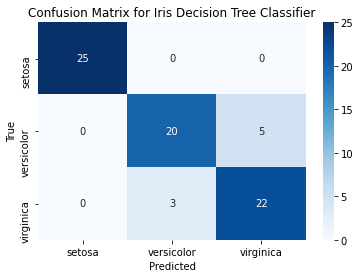

In [5]:
###Question 2

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

# Filter the training set to contain only the first 25 cases of each class
class_indices = [0, 1, 2]
X_train_filtered = []
y_train_filtered = []
for class_idx in class_indices:
    class_X = X_train[y_train == class_idx]
    class_y = y_train[y_train == class_idx]
    X_train_filtered.append(class_X[:25])
    y_train_filtered.append(class_y[:25])
X_train_filtered = np.concatenate(X_train_filtered)
y_train_filtered = np.concatenate(y_train_filtered)

# Build a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_filtered, y_train_filtered)

# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
class_names = iris.target_names
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Iris Decision Tree Classifier')
plt.show()

In [1]:
###Question 5

import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Root folder directory for images
imagefolder = 'D:/MS/ML Algorithms/data/caltech/caltech-101/101_ObjectCategoriestar/101_ObjectCategories/101_ObjectCategories'
imagesetpath = os.path.join(imagefolder)

# Create an ImageDataGenerator for image augmentation
data_generator = ImageDataGenerator(preprocessing_function=lambda x: x)  # No color preprocessing

# Create an ImageDataGenerator for training set
train_datagen = data_generator.flow_from_directory(
    imagesetpath,
    target_size=(224, 224),  # Resize images to match inputSize of ResNet50
    batch_size=32,  # Batch size for training
    class_mode='categorical',  # Categorical class mode for multiclass classification
    subset='training',  # Subset to training set
    shuffle=True,  # Shuffle the data
    seed=42  # Set random seed for reproducibility
)

# Create an ImageDataGenerator for test set
test_datagen = data_generator.flow_from_directory(
    imagesetpath,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Subset to test set
    shuffle=False,  # Do not shuffle the data for evaluation
    seed=42
)

# Load a pre-trained ResNet50 model
net = ResNet50(weights='imagenet', include_top=False, pooling='avg')
inputSize = net.layers[0].input_shape[1:3]  # Size of input data for ResNet50
layer = net.get_layer('avg_pool').output  # Features are extracted after avg_pool layer

# Feature extraction of training set and test set images using resized images
featuresTrain = net.predict(train_datagen)
featuresTest = net.predict(test_datagen)

# Labels for each training case
labels = train_datagen.classes
# Unique class labels
lclasses = list(train_datagen.class_indices.keys())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(featuresTrain, labels, test_size=0.2, random_state=42)


Found 9144 images belonging to 102 classes.
Found 0 images belonging to 102 classes.
286/286 [==============================] - 448s 2s/step


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the decision tree
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
Processing c:\users\chethankashyap\appdata\local\pip\cache\wheels\45\83\1e\3db22c5e1941c10e41c4f5cdf829b0a358146d4d0733d4a105\jax-0.4.8-py3-none-any.whl
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached grpcio-1.54.0-cp38-cp38-win_amd64.whl (4.1 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_io_gcs_filesy

In [7]:
pip install tensorflow

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\chethankashyap\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=7270712bb13dc2a65c61c0e0047f30b3a5409b9b220ea016ea9c5f42c98ec8f4
  Stored in directory: c:\users\chethankashyap\appdata\local\pip\cache\wheels\45\83\1e\3db22c5e1941c10e41c4f5cdf829b0a358146d4d0733d4a105
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [2]:
###Question 6

import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Root folder for images
imagefolder = 'D:/MS/ML Algorithms/data/caltech/caltech-101/101_ObjectCategoriestar/101_ObjectCategories/101_ObjectCategories'

# Create a list to store image data and labels
images = []
labels = []

# Load images and labels
for foldername in os.listdir(imagefolder):
    folderpath = os.path.join(imagefolder, foldername)
    for filename in os.listdir(folderpath):
        filepath = os.path.join(folderpath, filename)
        images.append(filepath)
        labels.append(foldername)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a support vector machine classifier
svm = SVC()

# Feature extraction of training set images
featuresTrain = []
for image_path in X_train:
    # Perform feature extraction on the image (e.g., resize, convert to grayscale, etc.)
    # Add the extracted features to the featuresTrain list
    featuresTrain.append(extract_features(image_path))

# Convert featuresTrain list to a numpy array
featuresTrain = np.array(featuresTrain)

# Train the SVM classifier
svm.fit(featuresTrain, y_train)

# Feature extraction of test set images
featuresTest = []
for image_path in X_test:
    # Perform feature extraction on the image (e.g., resize, convert to grayscale, etc.)
    # Add the extracted features to the featuresTest list
    featuresTest.append(extract_features(image_path))

# Convert featuresTest list to a numpy array
featuresTest = np.array(featuresTest)

# Predict labels for test set images
y_pred = svm.predict(featuresTest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


NameError: name 'extract_features' is not defined